### Classification implementation...

In [1]:
# in the basic terms classfication roughly has 5 terms for implemenetation:
# 1. Input data and features
# 2. Label and classes
# 3. Model and training data
# 4. Testing data
# 5. Accuracy

In [6]:
# import necessary libraries....

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

In [9]:
# input data with features: fruits and their sizes and colors
data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Watermelon', 'Grape', 'Lemon'],
    'Color': ['Red', 'Yellow', 'Orange', 'Green', 'Purple', 'Yellow'],
    'Size': ['Small', 'Small', 'Small', 'Large', 'Small', 'Small']
}

df = pd.DataFrame(data);
df

,Fruit,Color,Size
0,Apple,Red,Small
1,Banana,Yellow,Small
2,Orange,Orange,Small
3,Watermelon,Green,Large
4,Grape,Purple,Small
5,Lemon,Yellow,Small


In [11]:
# labels: fruits needs to be identified based on it's size and color.  model will be trained to get correct output(fruit)

labels = df["Fruit"]
labels

0         Apple
1        Banana
2        Orange
3    Watermelon
4         Grape
5         Lemon
Name: Fruit, dtype: object

In [14]:
# filter out input features(size, color) from dataset and encode them into binary form for better ML understanding

df_encoded = pd.get_dummies(df[["Color", "Size"]])
# df_encoded

In [34]:
# split data into train-test categories....

X_train, X_test, y_train, y_test = train_test_split(df_encoded, labels, test_size=0.3, random_state=42);

# it's time to train the model for given input features and labels(classes)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
X_train

,Color_Green,Color_Orange,Color_Purple,Color_Red,Color_Yellow,Size_Large,Size_Small
5,False,False,False,False,True,False,True
2,False,True,False,False,False,False,True
4,False,False,True,False,False,False,True
3,True,False,False,False,False,True,False


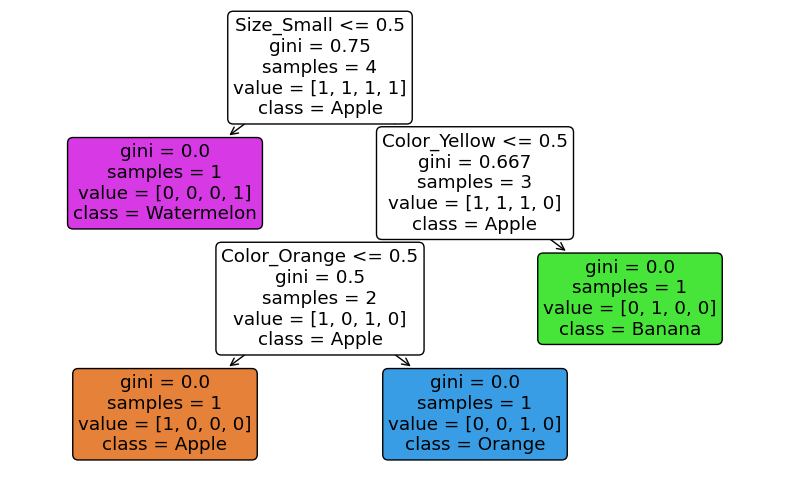

In [28]:
# visualize the decision tree for given model

plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=list(X_train.columns), class_names=list(labels.unique()), filled=True, rounded=True)
plt.show()

In [38]:
# test the model on unseen data to produce predictions
test_data = {
    'Color': ['Red', 'Yellow', 'Orange', 'Green'],
    'Size': ['Small', 'Small', 'Small', 'Large']
}

df_test = pd.DataFrame(test_data)

df_test_encoded = pd.get_dummies(df_test)
df_test_encoded

,Color_Green,Color_Orange,Color_Red,Color_Yellow,Size_Large,Size_Small
0,False,False,True,False,False,True
1,False,False,False,True,False,True
2,False,True,False,False,False,True
3,True,False,False,False,True,False


In [42]:
# predictions by the same model
df_test_encoded = pd.get_dummies(df_test)
df_test_encoded = df_test_encoded.reindex(columns=all_columns, fill_value=0)



In [46]:
predictions = model.predict(df_test_encoded)

accuracy = accuracy_score(['Apple', 'Banana', 'Orange', 'Watermelon'], predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.00%


### understand the classification algorithm using Iris dataset...

In [6]:
# dataset consists of 150 samples of iris flowers with three species and four features.
# species: setosa, versicolor & virginica
# features: sepal length, sepal width, petal length, and petal width

# Objective: Classify iris flowers into one of the three species based on their features.

In [8]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# configure iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# X = data basically input features
# y = target basically output features

In [14]:
# split the data into training and testing sectins
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2

In [16]:
# Choose a model (Random forest classifier in this case)
model = RandomForestClassifier()

# train the model

model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# make predictions by same trained model on unseen data (test data)

y_pred = model.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [27]:
# measure accuracy, report and confusion_matrix of predicted ouptut of model

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

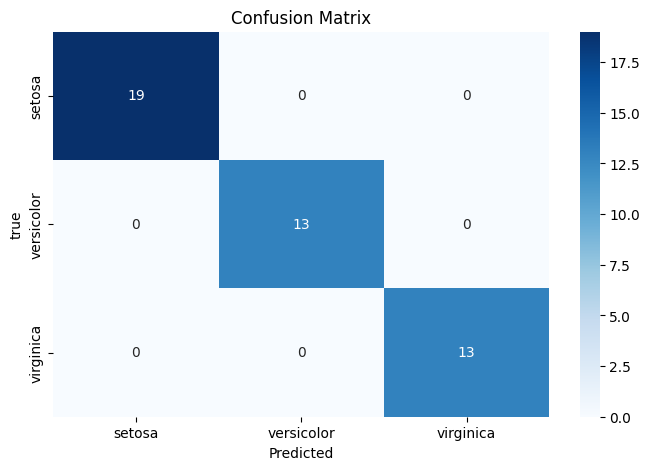

In [33]:
# data visualization using seaborn and matplotlib

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [28]:
# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

